<a href="https://colab.research.google.com/github/dorsax/betterplace_fetch/blob/main/betterplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import dateutil.parser as dp
 
#event = '33420'
event = '36177'
uri = 'https://api.betterplace.org/de/api_v4/fundraising_events/'+event+'/opinions.json?order=created_at:ASC&per_page=200'

In [ ]:
response = requests.get(uri)
jresponse = response.json()
#responses = list(range(1, 100))
#print(uri)
 
pages = jresponse['total_pages']
print(pages)

28


In [ ]:
table = pd.DataFrame()
sort=False
 
for page in range (1, pages+1):
  jsonpage = requests.get(uri+'&page='+str(page)).json()
  table = table.append(pd.DataFrame(jsonpage['data']),sort=sort)
table.head()
table.drop(['updated_at', 'matched', 'author', 'message', 'links'], axis=1, inplace=True)

In [ ]:
# table = table_bck
table_bck = table

In [ ]:
table['created_at_datetime'] = pd.to_datetime(table.created_at, format='%Y-%m-%dT%H:%M:%S%z')
 
table.head

<bound method NDFrame.head of          id  ...       created_at_datetime
0   4142450  ... 2020-11-05 16:47:38+01:00
1   4143616  ... 2020-11-06 17:10:31+01:00
2   4143943  ... 2020-11-07 02:37:55+01:00
3   4149319  ... 2020-11-10 22:13:42+01:00
4   4150433  ... 2020-11-11 14:51:32+01:00
..      ...  ...                       ...
78  4184330  ... 2020-11-16 16:08:26+01:00
79  4184516  ... 2020-11-16 18:42:06+01:00
80  4184626  ... 2020-11-16 19:47:37+01:00
81  4188390  ... 2020-11-19 03:27:19+01:00
82  4764353  ... 2021-03-24 16:27:45+01:00

[5483 rows x 7 columns]>

In [ ]:
 
 
table['donated_amount_in_Euro'] = table.donated_amount_in_cents.div(100).round(2)
#table['cyear'] = table.created_at.str.slice(0,4,1)
#table['cmonth'] = table.created_at.str.slice(5,7,1)
#table['cday'] = table.created_at.str.slice(8,10,1)
#table['chour'] = table.created_at.str.slice(11,13,1)
#table['cdate'] = table.cyear+'.'+table.cmonth+'.'+table.cday
 
table.sort_values(by=['id'], inplace=True)
table['cumsum'] = table.donated_amount_in_Euro.cumsum(axis = 0, skipna = True)
 
startdate = pd.to_datetime('2020-11-14T12:00:00+01:00', format='%Y-%m-%dT%H:%M:%S%z')-datetime.timedelta(hours=9, minutes=30)
enddate = table['created_at_datetime'].max()-datetime.timedelta(hours=9, minutes=35)
maxval = table['cumsum'].max() + 10000
 
table.head()

,id,created_at,donated_amount_in_cents,matched_amount_in_cents,score,confirmed_at,created_at_datetime,donated_amount_in_Euro,cumsum
0,4142450,2020-11-05T16:47:38+01:00,5000.0,0.0,positive,2020-11-05T16:48:32+01:00,2020-11-05 16:47:38+01:00,50.0,50.0
1,4143616,2020-11-06T17:10:31+01:00,1000.0,0.0,positive,2020-11-06T17:11:02+01:00,2020-11-06 17:10:31+01:00,10.0,60.0
2,4143943,2020-11-07T02:37:55+01:00,5000.0,0.0,positive,2020-11-07T02:38:43+01:00,2020-11-07 02:37:55+01:00,50.0,110.0
3,4149319,2020-11-10T22:13:42+01:00,5000.0,0.0,positive,2020-11-10T22:14:48+01:00,2020-11-10 22:13:42+01:00,50.0,160.0
4,4150433,2020-11-11T14:51:32+01:00,2000.0,0.0,positive,2020-11-11T14:52:25+01:00,2020-11-11 14:51:32+01:00,20.0,180.0


In [ ]:
# datestring = '2020-11-05T16:47:38+01:00   '
# yourdate = dateutil.parser.parse(datestring)
# print(yourdate)

In [ ]:
table.head
print(table['cumsum'].max())
print(maxval)

325858.4399999999
335858.4399999999


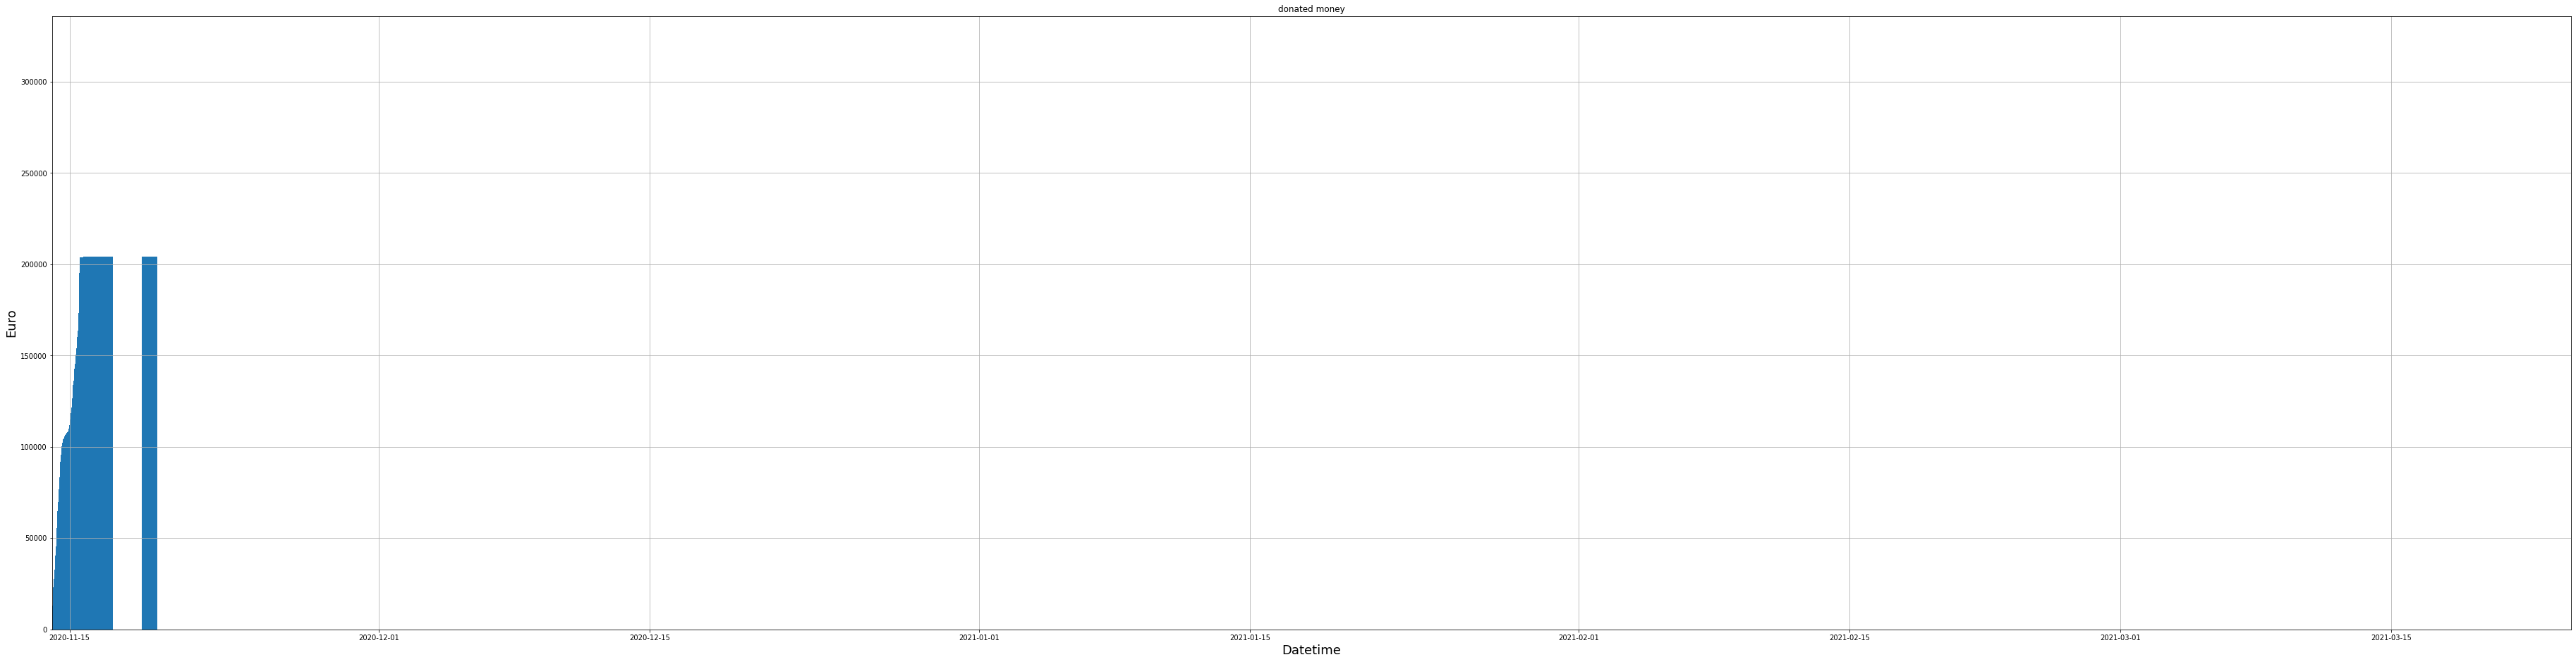

In [ ]:
#Visualize the donated money
plt.figure(figsize=(64,16))
#plt.figure(figsize=(320,80))
plt.title('donated money')
plt.bar(table['created_at_datetime'],table['cumsum'])
#plt.plot(table['created_at_datetime'],table['cumsum'], linewidth=2.0)
plt.axis([startdate, enddate, 0, maxval])
plt.xlabel('Datetime', fontsize=18)
plt.ylabel('Euro', fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [ ]:
# table.to_csv('betterplace_lfdw19_test.csv')

In [ ]:
 with pd.option_context('display.max_rows', None, 'display.max_columns', 9):  # more options can be specified also
     print(table)

          id                 created_at  donated_amount_in_cents  \
0    4142450  2020-11-05T16:47:38+01:00                   5000.0   
1    4143616  2020-11-06T17:10:31+01:00                   1000.0   
2    4143943  2020-11-07T02:37:55+01:00                   5000.0   
3    4149319  2020-11-10T22:13:42+01:00                   5000.0   
4    4150433  2020-11-11T14:51:32+01:00                   2000.0   
5    4152332  2020-11-12T19:12:29+01:00                   4000.0   
6    4153081  2020-11-13T09:46:57+01:00                    500.0   
7    4153352  2020-11-13T11:59:19+01:00                   5000.0   
8    4153358  2020-11-13T12:02:18+01:00                    500.0   
9    4153363  2020-11-13T12:04:01+01:00                   1000.0   
10   4153654  2020-11-13T15:39:36+01:00                   5000.0   
11   4153670  2020-11-13T15:52:13+01:00                   3000.0   
12   4153676  2020-11-13T15:56:34+01:00                   4000.0   
13   4153693  2020-11-13T16:17:29+01:00         

In [ ]:
print(table.query('donated_amount_in_Euro == "NaN"').count())
#print(table.loc[table.donated_amount_in_Euro == 'NaN'].count())
#print(len(df[table['donated_amount_in_Euro'] == 'NaN']))

id                         166
created_at                 166
donated_amount_in_cents      0
matched_amount_in_cents      0
score                      166
confirmed_at               166
created_at_datetime        166
donated_amount_in_Euro       0
cumsum                       0
dtype: int64
